<a href="https://colab.research.google.com/github/saadkarim165/ObjectDetectionProject/blob/main/ObjectDetection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%markdown
#Object Detection Model

#Object Detection Model


In [2]:
%%markdown 
## Importing Dependencies

## Importing Dependencies


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import random
import shutil as sh

from tqdm.auto import tqdm
from PIL import Image
from google.colab.patches import cv2_imshow

In [5]:
!unzip /Vehicles-OpenImages.v1-416x416.yolokeras.zip

Archive:  /Vehicles-OpenImages.v1-416x416.yolokeras.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/00dea1edf14f09ab_jpg.rf.3f17c8790a68659d03b1939a59ccda80.jpg  
 extracting: test/00dea1edf14f09ab_jpg.rf.KJ730oDTFPdXdJxvSLnX.jpg  
 extracting: test/00e481ea1a520175_jpg.rf.6e6a8b3b45c9a11d106958f88ff714ea.jpg  
 extracting: test/00e481ea1a520175_jpg.rf.MV6sZ8QCFwFeMYaI2tHm.jpg  
 extracting: test/08c8b73e0c2e296e_jpg.rf.7IkYAamjZhnwsoXSrwKt.jpg  
 extracting: test/08c8b73e0c2e296e_jpg.rf.effa65856584463c08848031cab357b9.jpg  
 extracting: test/10c26c6598677a1f_jpg.rf.USCbBYVcUICkLhuq07Lw.jpg  
 extracting: test/10c26c6598677a1f_jpg.rf.f72b2b91e750909f68fffeee777e9350.jpg  
 extracting: test/1ef77c61856d3b4b_jpg.rf.HZMSiUVx3WUcMIooJMZX.jpg  
 extracting: test/1ef77c61856d3b4b_jpg.rf.a528f50763101224fad39907062c5026.jpg  
 extracting: test/259ff749ac781352_jpg.rf.8acc4aba3916d2dd58c3acca8890194b.jpg  
 extracting: test/

In [6]:
train_dir = "/content/train"
test_dir = "/content/test"

print('Image(train): ', len(os.listdir(train_dir)))
print('Image(test): ', len(os.listdir(test_dir)))

Image(train):  880
Image(test):  128


In [11]:
data = pd.read_csv("/content/train/_annotations.txt",header=None,delimiter='\t')
max_length=0
for i,j in data.iterrows():
  if len(j[0].split(' '))>max_length:
    max_length=len(j[0].split(' '))
  else:
    continue
print(max_length)

10


In [12]:
# data=data.rename(columns={0: 'ImageName', 1: 'xmin',2: 'ymin',3: 'xmax',4: 'ymax',5: 'xmin2',6: 'ymin2',7: 'xmax2',8: 'ymax2'})

In [13]:
# data.iloc[217][0]

In [14]:
print(data.shape)
data.nunique()

(878, 1)


0    878
dtype: int64

(416, 416, 3)


True

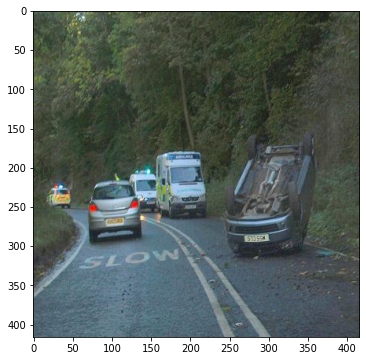

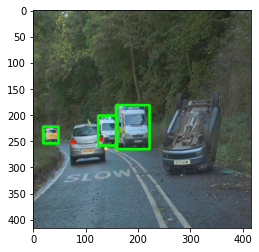

In [15]:
IMAGE_SHAPE = 0
points={}
points1={}
rand = 217
random_row = data.iloc[rand]
rand_list= random_row[0]
image = plt.imread(train_dir +'/'+ rand_list.split(' ')[0])
plt.figure(figsize=(8,6))
plt.imshow(image)
IMAGE_SHAPE = image.shape
print(image.shape)
list_values=rand_list.split(' ')
for i in range(1,len(list_values)):
  pnts=list_values[i].split(',')[:4]
  # print(pnts)
  points["point{0}".format(i)] = int(pnts[0]), int(pnts[1])
  points1["point{0}".format(i)] = int(pnts[2]), int(pnts[3])
# print(points)
for i,j in enumerate(points):
  cv2.rectangle(image,points[j], points1[j], color=(0, 255, 0), thickness=3)
# cv2.rectangle(image,points['point2'], points1['point2'], color=(0, 255, 0), thickness=3)
# cv2.rectangle(image,points['point3'], points1['point3'], color=(0, 255, 0), thickness=3)
plt.figure()
plt.imshow(image)
points['point2']==(124,201)

In [ ]:
points

{'point1': (19, 222), 'point2': (124, 201), 'point3': (158, 181)}

(416, 416, 3)
(416, 416, 3)
(416, 416, 3)
(416, 416, 3)


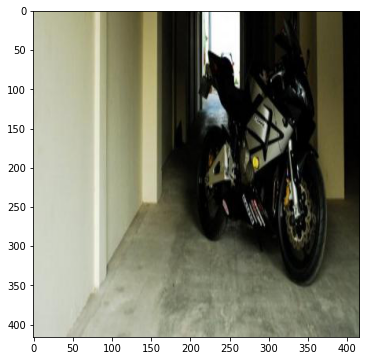

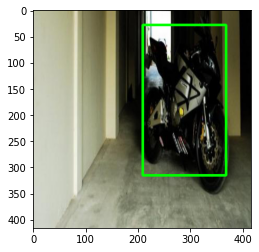

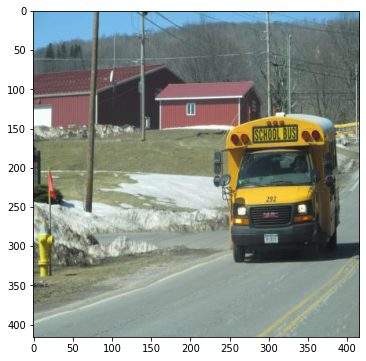

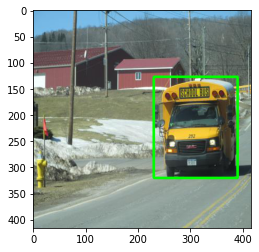

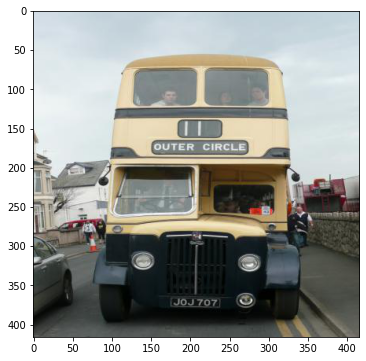

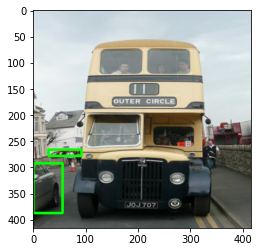

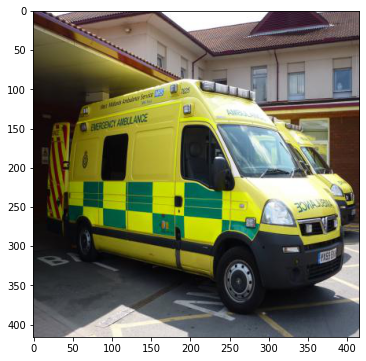

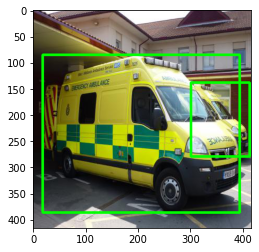

In [16]:
# IMAGE_SHAPE = 0
# for i in range(4):
#     rand = np.random.randint(0, data.shape[0])
#     random_row = data.iloc[rand]
#     image = plt.imread(train_dir +'/'+ random_row[0])
#     plt.figure()
#     plt.imshow(image)
#     IMAGE_SHAPE = image.shape
#     print(image.shape)
#     print('Name,xmin,ymin,xmax,ymax:',random_row)
#     point1 = (int(random_row[1]), int(random_row[2]))
#     point2 = (int(random_row[3]), int(random_row[4]))
#     cv2.rectangle(image, point1, point2, color=(0, 255, 0), thickness=3)
#     plt.figure()
#     plt.imshow(image)

IMAGE_SHAPE = 0
for i in range(4):
  points={}
  points1={}
  rand = np.random.randint(0, data.shape[0])
  random_row = data.iloc[rand]
  rand_list= random_row[0]
  image = plt.imread(train_dir +'/'+ rand_list.split(' ')[0])
  plt.figure(figsize=(8,6))
  plt.imshow(image)
  IMAGE_SHAPE = image.shape
  print(image.shape)
  list_values=rand_list.split(' ')
  for i in range(1,len(list_values)):
    pnts=list_values[i].split(',')[:4]
  # print(pnts)
    points["point{0}".format(i)] = int(pnts[0]), int(pnts[1])
    points1["point{0}".format(i)] = int(pnts[2]), int(pnts[3])
# print(points)
  for i,j in enumerate(points):
    cv2.rectangle(image,points[j], points1[j], color=(0, 255, 0), thickness=3)
# cv2.rectangle(image,points['point2'], points1['point2'], color=(0, 255, 0), thickness=3)
# cv2.rectangle(image,points['point3'], points1['point3'], color=(0, 255, 0), thickness=3)
  plt.figure()
  plt.imshow(image)


['bdc6ddcd3b5129bb_jpg.rf.00da54335aeba68b1d59d976f1f7c3d3.jpg 41,163,155,303,1 143,136,416,350,1\n', 'b61201eee8903342_jpg.rf.00edd486466508ba478ce7709da69352.jpg 216,44,407,378,1 44,48,235,356,1\n', '2b9ced539656ae78_jpg.rf.09375be44a0f433daca7f5d9d5a69aa1.jpg 42,128,162,247,2\n', '6704ff10a79cf50f_jpg.rf.03b95bd8ac711d2eba2e5edaf09318b4.jpg 0,70,79,323,0 75,62,343,365,0 309,94,415,309,0\n', 'ca00cc1e9f910cfa_jpg.rf.050bd662c9b06cd0b9b90bf08ac1247b.jpg 37,58,397,390,2 242,20,332,76,2 329,38,369,83,2 361,35,415,202,2\n', 'bb77a64dbce401ed_jpg.rf.0595e0a7911e709f9e8716977eec3dd2.jpg 25,111,381,359,2 373,98,415,200,2\n', '011a8a0a921c2376_jpg.rf.064272f1b667f68b4340d240244ff7e8.jpg 0,0,398,415,4\n', 'dc8bd5855688ad54_jpg.rf.01614de7d7ff5420962415f25eaa4028.jpg 5,206,159,268,2 257,204,409,270,2 345,302,416,416,2\n', '0b35c604f8a87bd0_jpg.rf.0771220380bd5aa3d252ce58471bf2c7.jpg 0,44,145,283,0 1,58,35,130,0 50,17,336,363,0\n', '1c64bff45216007f_jpg.rf.00472dc1dcd49262a84274a23e3a1999.jpg 4

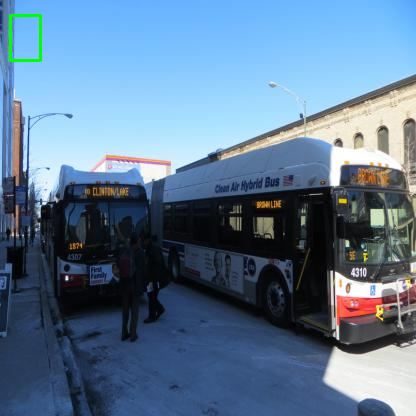

In [ ]:
# image = cv2.imread("/bdc6ddcd3b5129bb_jpg.rf.vGGKLMAv30Zlex9EOx9X.jpg")
# with open("/_annotations.txt", "r") as f:

#   lines = f.readlines()
#   print(lines)

# for line in lines_1:
#   x, y, w, h = (10,15,30,45) # Draw the box on the image
#   cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2) # Display the image with the annotations
# cv2_imshow(image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()



In [17]:
!git clone https://github.com/ultralytics/yolov5
!cd yolov5
!pip install -r ./yolov5/requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 15305, done.
remote: Total 15305 (delta 0), reused 0 (delta 0), pack-reused 15305
Receiving objects: 100% (15305/15305), 14.19 MiB | 29.95 MiB/s, done.
Resolving deltas: 100% (10500/10500), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.4 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 63.4.3
    Uninstalling setuptools-63.4.3:
      Successfully uninstalled setuptools-63.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
cvxpy 

In [19]:
data

,0
0,bdc6ddcd3b5129bb_jpg.rf.00da54335aeba68b1d59d9...
1,b61201eee8903342_jpg.rf.00edd486466508ba478ce7...
2,2b9ced539656ae78_jpg.rf.09375be44a0f433daca7f5...
3,6704ff10a79cf50f_jpg.rf.03b95bd8ac711d2eba2e5e...
4,ca00cc1e9f910cfa_jpg.rf.050bd662c9b06cd0b9b90b...
...,...
873,a37730f43629ed00_jpg.rf.b2NktvrYPF8IJunrKBQV.j...
874,552a0d9a0fc92dac_jpg.rf.c1d215d149e6deb7126925...
875,43f9dfb36618117e_jpg.rf.c374950b7a017b990d29dd...
876,ceaec0f3cdb104c0_jpg.rf.bbacf3d4ed5518a6d05cf1...


In [22]:
# data.loc[0]

0    bdc6ddcd3b5129bb_jpg.rf.00da54335aeba68b1d59d9...
Name: 0, dtype: object

In [25]:
data= data[0].str.split(' ', expand=True)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,bdc6ddcd3b5129bb_jpg.rf.00da54335aeba68b1d59d9...,"41,163,155,303,1","143,136,416,350,1",None,None,None,None,None,None,None
1,b61201eee8903342_jpg.rf.00edd486466508ba478ce7...,"216,44,407,378,1","44,48,235,356,1",None,None,None,None,None,None,None
2,2b9ced539656ae78_jpg.rf.09375be44a0f433daca7f5...,"42,128,162,247,2",None,None,None,None,None,None,None,None
3,6704ff10a79cf50f_jpg.rf.03b95bd8ac711d2eba2e5e...,"0,70,79,323,0","75,62,343,365,0","309,94,415,309,0",None,None,None,None,None,None
4,ca00cc1e9f910cfa_jpg.rf.050bd662c9b06cd0b9b90b...,"37,58,397,390,2","242,20,332,76,2","329,38,369,83,2","361,35,415,202,2",None,None,None,None,None


In [62]:
# data.iloc[:,1:10].str.split(',', expand=True)

Image_col= data.iloc[:,0]
df= pd.DataFrame()
df= pd.concat([df,Image_col])
df.head()
for i in range(1,10):
  df1=data.iloc[:,i].str.split(',', expand=True)
  # print(df1.head())
  df= pd.concat([df,df1],axis=1)
  print(df.head())

                                                   0    0    1    2    3  4
0  bdc6ddcd3b5129bb_jpg.rf.00da54335aeba68b1d59d9...   41  163  155  303  1
1  b61201eee8903342_jpg.rf.00edd486466508ba478ce7...  216   44  407  378  1
2  2b9ced539656ae78_jpg.rf.09375be44a0f433daca7f5...   42  128  162  247  2
3  6704ff10a79cf50f_jpg.rf.03b95bd8ac711d2eba2e5e...    0   70   79  323  0
4  ca00cc1e9f910cfa_jpg.rf.050bd662c9b06cd0b9b90b...   37   58  397  390  2
                                                   0    0    1    2    3  4  \
0  bdc6ddcd3b5129bb_jpg.rf.00da54335aeba68b1d59d9...   41  163  155  303  1   
1  b61201eee8903342_jpg.rf.00edd486466508ba478ce7...  216   44  407  378  1   
2  2b9ced539656ae78_jpg.rf.09375be44a0f433daca7f5...   42  128  162  247  2   
3  6704ff10a79cf50f_jpg.rf.03b95bd8ac711d2eba2e5e...    0   70   79  323  0   
4  ca00cc1e9f910cfa_jpg.rf.050bd662c9b06cd0b9b90b...   37   58  397  390  2   

      0     1     2     3     4  
0   143   136   416   350     1  
1

In [63]:
df.head()

,0,0,1,2,3,4,0,1,2,3,...,0,1,2,3,4,0,1,2,3,4
0,bdc6ddcd3b5129bb_jpg.rf.00da54335aeba68b1d59d9...,41,163,155,303,1,143,136,416,350,...,None,None,None,None,None,None,None,None,None,None
1,b61201eee8903342_jpg.rf.00edd486466508ba478ce7...,216,44,407,378,1,44,48,235,356,...,None,None,None,None,None,None,None,None,None,None
2,2b9ced539656ae78_jpg.rf.09375be44a0f433daca7f5...,42,128,162,247,2,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,6704ff10a79cf50f_jpg.rf.03b95bd8ac711d2eba2e5e...,0,70,79,323,0,75,62,343,365,...,None,None,None,None,None,None,None,None,None,None
4,ca00cc1e9f910cfa_jpg.rf.050bd662c9b06cd0b9b90b...,37,58,397,390,2,242,20,332,76,...,None,None,None,None,None,None,None,None,None,None
